# Assignment 2

# Data Collection

In [3]:
import pandas as pd
# Read data that was exported from previous session
df = pd.read_csv("C:/Users/leo/Downloads/Assignment_3/df_out_dsif5.csv")
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,term_numeric,debt_to_income,interest_per_loan_amnt,loan_amnt_log,grade_encoded,loan_amnt_std,annual_inc_std,loan_amnt_norm,annual_inc_norm,loan_default
0,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,...,36,0.083333,1569.6,8.294300,1,-1.196895,-0.367206,0.083969,0.004364,False
1,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,...,60,0.421053,10992.0,10.085851,1,0.915452,-0.264024,0.592875,0.005182,False
2,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,B3,driver,...,36,0.090909,1573.5,8.517393,1,-1.091278,-0.286953,0.109415,0.005000,False
3,134798709,24000.0,24000.0,24000.0,60 months,11.05%,522.42,B,B4,NaN,...,60,0.551724,13260.0,10.085851,1,0.915452,-0.418798,0.592875,0.003955,False
4,127097355,14000.0,14000.0,14000.0,60 months,13.59%,322.79,C,C2,Shipping Clerk,...,60,0.291667,9513.0,9.546884,2,-0.140722,-0.367206,0.338422,0.004364,False


# Define target variable

In [5]:
df['loan_default'] = df.loan_status == "Charged Off"
df['loan_default'].value_counts()

# Export so it can be used in future classes
df.to_csv("C:/Users/leo/Downloads/ELVTR - Training - Folder/df_out_dsif2.csv"
                        , index = False)

# Feature engineering and selection

In [7]:
features = ['installment', 'revol_bal', 'recoveries', 'collection_recovery_fee',
       'last_fico_range_high', 'last_fico_range_low', 'tot_cur_bal',
       'open_acc_6m', 'open_il_24m', 'total_bal_il', 'inq_fi',
       'acc_open_past_24mths', 'bc_util', 'mo_sin_old_il_acct',
       'percent_bc_gt_75', 'total_il_high_credit_limit', 'last_pymnt_amnt_log',
       'last_pymnt_amnt_capped', 'grade_encoded', 'annual_inc_std']

X = df[features]
y = df['loan_default']

# Data preprocessing

In [9]:
# Initialize and train the Logistic Regression model
from sklearn.impute import SimpleImputer

# LogisticRegression model in scikit-learn cannot handle missing values represented as NaN (Not a Number), hence replacing
# Create an imputer (replace missing values with the mean of the column)
imputer = SimpleImputer(strategy='mean')
# What pandas method did we see previously to accomplish this?

# Fit the imputer
X = imputer.fit_transform(X)

# Data splitting

In [11]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (returns pandas dfs)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
for dframe in [X_train, X_test, y_train, y_test]:
    print(f"Shape: {dframe.shape}")

Shape: (80000, 20)
Shape: (20000, 20)
Shape: (80000,)
Shape: (20000,)


# Model selection

In [14]:
from sklearn.linear_model import LogisticRegression

model_2 = LogisticRegression() # full list of scikit learn models here: https://scikit-learn.org/stable/supervised_learning.html

# Model training

In [16]:
model_2.fit(X_train, y_train)

C:\Users\leo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Generate prediction

In [18]:
# Predict on the test set
predictions = model_2.predict(X_test)
predictions

array([False, False, False, ..., False, False, False])

# Evaluating Metrics

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, model_2.predict_proba(X_test)[:,1])

# Display the confusion matrix
cm = confusion_matrix(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC-AUC: {roc_auc}')
print(f'Confusion Matrix:\n{cm}')

Accuracy: 0.9617
Precision: 0.991740412979351
Recall: 0.6909165639128648
F1-Score: 0.814437984496124
ROC-AUC: 0.9666154669980429
Confusion Matrix:
[[17553    14]
 [  752  1681]]


# Visual for interpretation

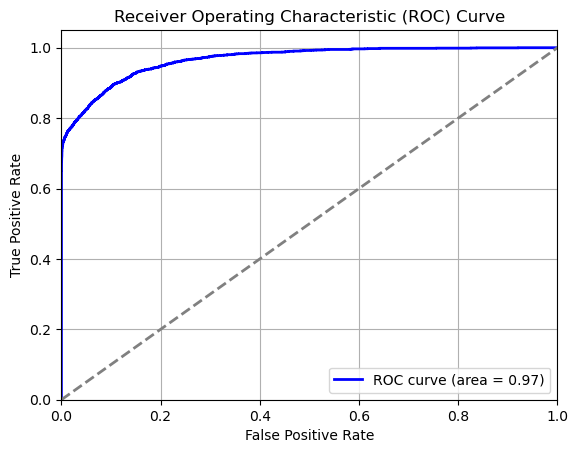

ROC AUC Score: 0.97


In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Assuming you have a trained model and test data (X_test, y_test)
# Replace these with your actual data and model
# Example: model_2 = LogisticRegression().fit(X_train, y_train)
# Example: y_pred_prob = model.predict_proba(X_test)[:, 1]

# Compute predicted probabilities (for the positive class)
y_pred_prob = model_2.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line (random prediction)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Additional stats
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_prob):.2f}')

# Handling imbalanced data using SMOTE

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y) 

In [25]:
y_resampled.head()

0    False
1    False
2    False
3    False
4    False
Name: loan_default, dtype: bool

# Overfitting and Cross-validation

In [27]:
from sklearn.model_selection import cross_val_score

# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(model_2, X, y, cv=5, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean()}')

C:\Users\leo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\leo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

Cross-Validation Accuracy Scores: [0.9659  0.96615 0.9672  0.95865 0.9664 ]
Mean CV Accuracy: 0.96486


C:\Users\leo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# Part 2: Optimise Classification Model Using Custom Loss Function

As a data scientist working for the business, your objective is to minimize the average cost of default and maximize the average income on loans.   
Optimise model_2 on this basis, leveraging a custom loss function (see 7.2 below) and considering the following information on the cost of   
misclassifying unseen observations:  
Misclassification cost, and importance of False Positives and False Negatives:  

    False Positives (FP): Predicting a loan as default when it is not. This can lead to lost opportunities for the lender since a potentially  
    profitable loan is denied. Given the FP_cost = 100, the cost is relatively low, but it can accumulate over multiple instances.

    False Negatives (FN): Predicting a loan as non-default when it actually defaults. This is much more severe because it results in financial  
    loss to the lender. Given the FN_cost = 1000, the cost here is much higher, reflecting the significant impact of a loan defaulting when  
    it was predicted otherwise.  


In [30]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Train logistic regression model
model_2 = LogisticRegression()
model_2.fit(X_train, y_train)

# Predictions
y_pred_prob = model_2.predict_proba(X_train)[:, 1]

# Define costs
FP_cost = 100
FN_cost = 1000

# Custom thresholding based on custom loss function
def custom_loss(y_true, y_pred_prob, threshold):
    y_pred = (y_pred_prob > threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return FP_cost * fp + FN_cost * fn

# Evaluate model for various thresholds
thresholds = np.arange(0.1, 0.9, 0.01)
losses = [custom_loss(y_train, y_pred_prob, t) for t in thresholds]

# Select the threshold with the minimum loss
best_threshold = thresholds[np.argmin(losses)]
best_loss = min(losses)

print(f"Best Threshold: {best_threshold}")
print(f"Lowest Custom Loss: {best_loss}")

C:\Users\leo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Threshold: 0.1
Lowest Custom Loss: 2118500


# Threshold Adjustment

In [51]:
# Apply the best threshold to the test data
y_pred_prob_test = model_2.predict_proba(X_test)[:, 1]
y_pred_custom = (y_pred_prob_test > best_threshold).astype(int)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Apply the best threshold to the test set
y_pred_prob_test = model_2.predict_proba(X_test)[:, 1]
y_pred_custom = (y_pred_prob_test > best_threshold).astype(int)

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_custom)
tn, fp, fn, tp = conf_matrix.ravel()  # Extract true negatives, false positives, etc.
print("Confusion Matrix:")
print(conf_matrix)

# 2. Accuracy
accuracy = accuracy_score(y_test, y_pred_custom)
print(f"Accuracy: {accuracy:.2f}")

# 3. Custom Loss Function
# Define the costs
FP_cost = 100
FN_cost = 1000

# Custom loss calculation
def calculate_custom_loss(fp, fn, FP_cost=100, FN_cost=1000):
    return FP_cost * fp + FN_cost * fn

# Calculate custom loss based on the confusion matrix
custom_loss = calculate_custom_loss(fp, fn)
print(f"Custom Loss: {custom_loss}")

Confusion Matrix:
[[16573   994]
 [  400  2033]]
Accuracy: 0.93
Custom Loss: 499400


# Part 3: Regression Model to Predict Loan Amount

Part 3 - Optional  

The business also wants you to do a PoC to see if they can predict loan_amnt based on the following features  
(feel free to use additional ones if you would like): emp_length,home_ownership, annual_inc. Build a brand new regression model,  
reg_model, leveraging LinearRegression from sklearn.linear_model ( see here)  
Tips:  

    Feature Engineering: Explore new features that might improve model performance. You may want or need to use some  
of the techniques covered in session 3.  
    Cross-Validation: Implement cross-validation to ensure your model does not overfit to the training data.  
    Threshold Adjustment: Consider adjusting the decision threshold to balance false positives and false negatives based on the associated costs.  

Deliverables:  

    A Jupyter Notebook containing:  
        Detailed explanations of feature selection and engineering.  
        Cross-validation implementation.  
        Final model performance evaluation using custom loss metrics (FP_cost and FN_cost).  
        Part 2 (optional): Custom loss function implementation and loss optimisation  

Good luck, and remember to focus on minimizing the overall cost while ensuring robust model performance!  

In [66]:
# Check for unique values in the 'emp_length' column to verify remaining non-numeric entries
print(df['emp_length'].unique())

# Apply the mapping again to ensure everything is converted
emp_length_mapping = {
    '10+ years': 10, '9 years': 9, '8 years': 8, '7 years': 7, '6 years': 6,
    '5 years': 5, '4 years': 4, '3 years': 3, '2 years': 2, '1 year': 1,
    '< 1 year': 0, 'n/a': 0, np.nan: 0
}

df['emp_length'] = df['emp_length'].map(emp_length_mapping)

# Check again to ensure all values are numeric now
print(df['emp_length'].unique())

# Encode 'home_ownership' using one-hot encoding
home_ownership_encoded = pd.get_dummies(df['home_ownership'], drop_first=True)

# Combine the processed columns into the feature set
X = pd.concat([df[['emp_length', 'annual_inc']], home_ownership_encoded], axis=1)

# Target variable: 'loan_default'
y = df['loan_default']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predicting on the test data
y_pred = reg_model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE) for evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

['10+ years' '6 years' nan '2 years' '4 years' '7 years' '9 years'
 '5 years' '1 year' '8 years' '< 1 year' '3 years']
[10  6  0  2  4  7  9  5  1  8  3]
Root Mean Squared Error: 0.3261703749355571


# Cross-Validation

In [69]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(reg_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = np.mean(np.sqrt(-cv_scores))
print(f"Mean RMSE from Cross-Validation: {mean_cv_score}")

Mean RMSE from Cross-Validation: 0.32876577868968615
